<a href="https://colab.research.google.com/github/fredagbona/suiteMl_Tasks/blob/main/Analyse_des_donn%C3%A9es_de_l'iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Problème 1] Acquisition de données

In [1]:

import numpy as np

from sklearn.datasets import load_iris

iris_datas = load_iris()

iris_datas

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [2]:
import pandas as pd
data = iris_datas.data

X = pd.DataFrame(data, columns=list(iris_datas.feature_names))


X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
target = iris_datas.target

y = pd.DataFrame(target,columns=["species"])

y.head()

,species
0,0
1,0
2,0
3,0
4,0


[Problème 2] Combinaison de données

In [4]:
df = pd.concat([X,y], axis=1, join="outer")
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


[Problème 3] Confirmation des données

In [5]:
df[3:4]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
3,4.6,3.1,1.5,0.2,0


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [7]:
df.sum()

sepal length (cm)    876.5
sepal width (cm)     458.6
petal length (cm)    563.7
petal width (cm)     179.9
species              150.0
dtype: float64

In [8]:
df.isnull()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
df.value_counts()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  species
5.8                2.7               5.1                1.9               2          2
6.2                2.2               4.5                1.5               1          1
                   2.9               4.3                1.3               1          1
                   3.4               5.4                2.3               2          1
6.3                2.3               4.4                1.3               1          1
                                                                                    ..
5.4                3.9               1.3                0.4               0          1
                                     1.7                0.4               0          1
5.5                2.3               4.0                1.3               1          1
                   2.4               3.7                1.0               1          1
7.9                3.8               6.4        

[Problème 4] Investigation de l'ensemble de données iris lui-même

Le jeu de données Iris contient cinq colonnes telles que la longueur des pétales, la largeur des pétales, la longueur des sépales, la largeur des sépales et le type d'espèce. L'iris étant une plante à fleurs, les chercheurs ont mesuré diverses caractéristiques des différentes fleurs d'iris et les ont enregistrées numériquement.

Les ressources pour cet ensemble de données peuvent être trouvées à https://www.openml.org/d/61
https://datahub.io/machine-learning/iris

Auteur : R. A. Fisher Source : UCI - 1936 - Don de Michael Marshall Veuillez citer :

Iris Plants Database Il s'agit peut-être de la base de données la plus connue dans la littérature sur la reconnaissance des formes. L'article de Fisher est un classique dans le domaine et est fréquemment référencé à ce jour. (Voir Duda & Hart, par exemple.) L'ensemble de données contient 3 classes de 50 instances chacune, où chaque classe fait référence à un type d'iris. Une classe est linéairement séparable des 2 autres ; ces derniers ne sont PAS linéairement séparables les uns des autres.

Attribut prédit : classe d'iris. C'est un domaine extrêmement simple.

Informations sur les attributs :
https://datahub.io/machine-learning/iris#attribute-information

1. longueur des sépales en cm
2. largeur des sépales en cm
3. longueur des pétales en cm
4. largeur des pétales en cm
5. classe :
   --Iris Setosa
   -- Iris Versicolor
   -- Iris de Virginie

[Problème 5] Extraire les données nécessaires

In [12]:
#get by key 
df["sepal width (cm)"]


0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [13]:
#use .loc() The “loc” 

df.loc[:,"sepal width (cm)"]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [14]:
#use .iloc()

df.iloc[:,1]

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [15]:
df.loc[50:99]
#df[50:100]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


In [16]:
df.loc[50:99,"petal length (cm)"]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
99    4.1
Name: petal length (cm), dtype: float64

In [17]:
p = df["petal width (cm)"]
p[df["petal width (cm)"]==0.2]

0     0.2
1     0.2
2     0.2
3     0.2
4     0.2
7     0.2
8     0.2
10    0.2
11    0.2
14    0.2
20    0.2
22    0.2
24    0.2
25    0.2
27    0.2
28    0.2
29    0.2
30    0.2
33    0.2
34    0.2
35    0.2
36    0.2
38    0.2
39    0.2
42    0.2
46    0.2
47    0.2
48    0.2
49    0.2
Name: petal width (cm), dtype: float64

[Problème 6] Dessin

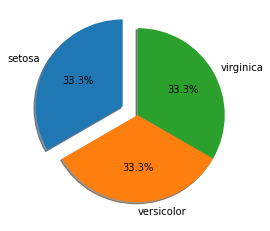

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

setosea_sample = df[df["species"]==0].shape[0]
versicolor_sample = df[df["species"]==1].shape[0]
virginica_sample = df[df["species"]==2].shape[0]

samples_array = [setosea_sample,versicolor_sample,virginica_sample]


spices = iris_datas.target_names # name of sample
myexplode = [0.2, 0, 0] # Pull the wedges 0.2 from the center of the pie:


plt.pie(samples_array, labels = spices, explode = myexplode, shadow = True, startangle = 90, autopct='%1.1f%%')
plt.show() 

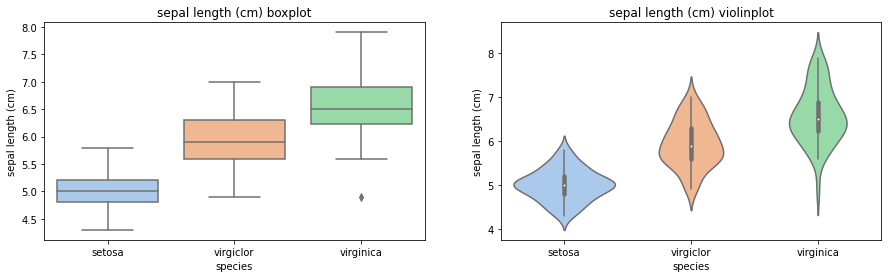

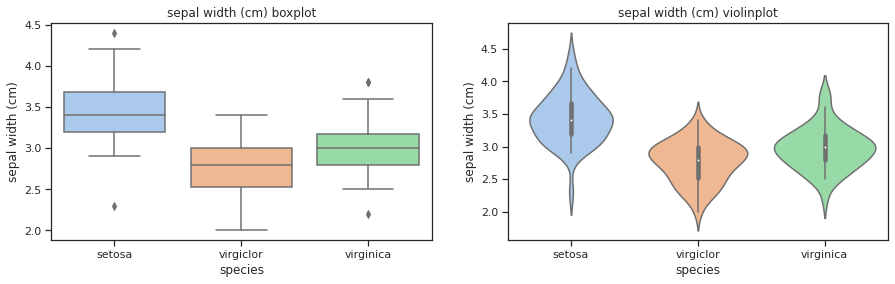

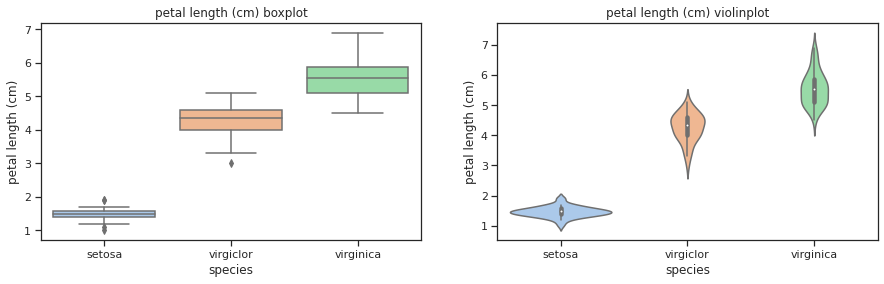

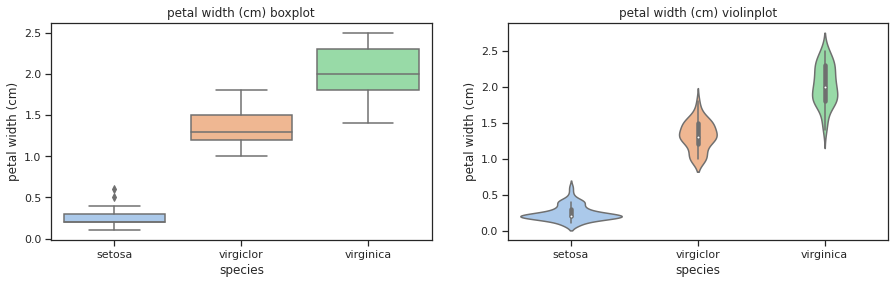

In [19]:
import seaborn as sns

features = df.keys()[0:4]

for feature in features:
    fig, axes = plt.subplots(1, 2)
    fig.set_size_inches(15, 4)

    sns.set_theme(style="ticks", palette="pastel")
    
    feature
    # box plot
    sns.boxplot(x=df["species"],y=df[feature], data=df,ax=axes[0])
    axes[0].set_xticklabels(['setosa','virgiclor','virginica'])
    axes[0].set_title('{} boxplot'.format(feature))

    #violin plot()
    sns.violinplot(x=df["species"], y=df[feature],data=df,ax=axes[1])
    axes[1].set_xticklabels(['setosa','virgiclor','virginica'])
    axes[1].set_title('{} violinplot'.format(feature))

[Problème 7] Confirmation de la relation entre les quantités d'entités

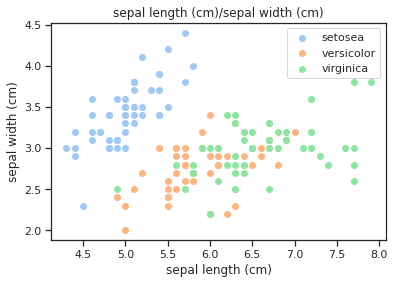

In [20]:
setosea = df[df["species"]==0]
versicolor = df[df["species"]==1]
virginica = df[df["species"]==2]


plt.title("sepal length (cm)/sepal width (cm)")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

plt.scatter(setosea.loc[:,"sepal length (cm)"],setosea.loc[:,"sepal width (cm)"],label="setosea")
plt.scatter(versicolor.loc[:,"sepal length (cm)"],versicolor.loc[:,"sepal width (cm)"],label="versicolor")
plt.scatter(virginica.loc[:,"sepal length (cm)"],virginica.loc[:,"sepal width (cm)"],label="virginica")

plt.legend()

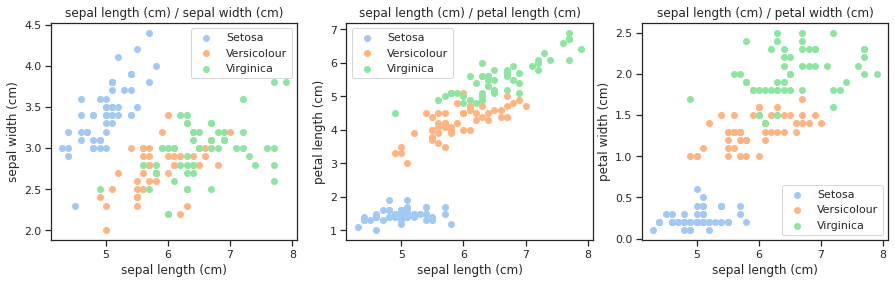

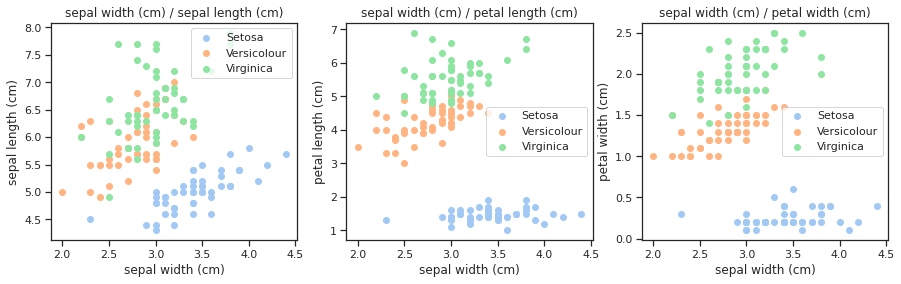

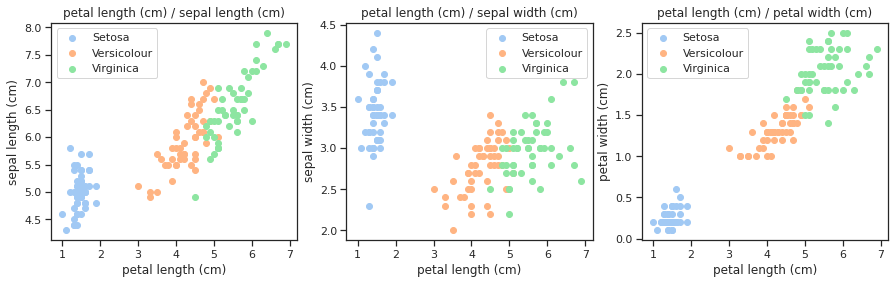

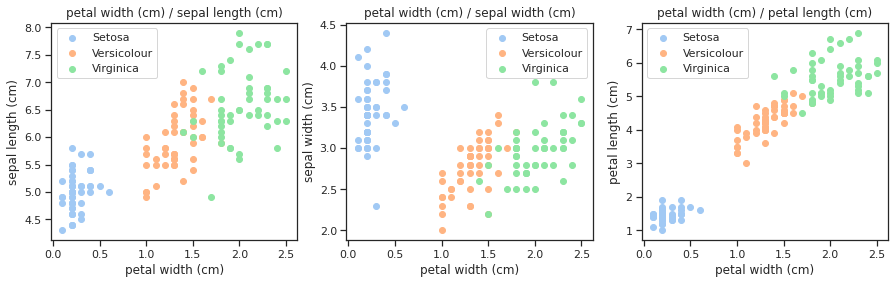

In [21]:
features = df.keys()[0:4]
spices = ["Setosa", "Versicolour", "Virginica"]

for feature1 in features:    
    i=0
    fig, ((axe1,axe2,axe3)) = plt.subplots(1, 3, figsize=(15, 4))
    for feature2 in features:
        if feature1 != feature2:
            axe = [axe1, axe2, axe3]
            axe[i].set_title('{} / {}'.format(feature1,feature2))
            axe[i].set_xlabel(feature1)
            axe[i].set_ylabel(feature2)
            axe[i].scatter(setosea.loc[:,feature1], setosea.loc[:,feature2], label = spices[0])
            axe[i].scatter(versicolor.loc[:,feature1], versicolor.loc[:,feature2], label = spices[1])
            axe[i].scatter(virginica.loc[:,feature1], virginica.loc[:,feature2], label = spices[2])
            axe[i].legend()
            i += 1

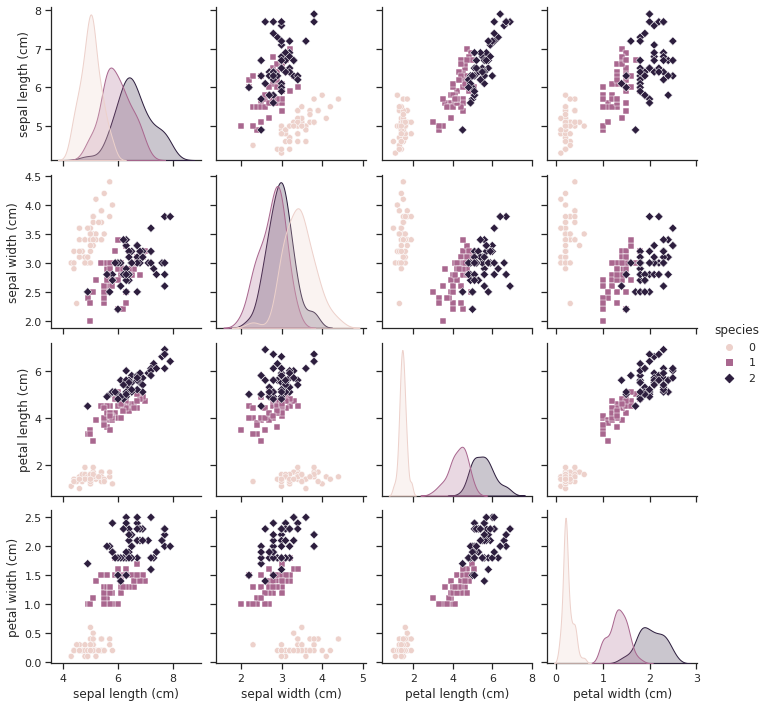

In [22]:
sns.pairplot(df, diag_kind="kde",hue='species',markers=["o", "s", "D"])

In [23]:
corrMatrix = X.corr()
corrMatrix

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


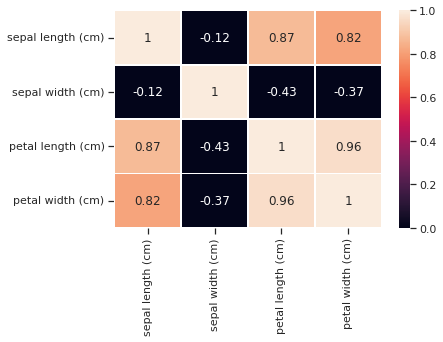

In [24]:
sns.heatmap(corrMatrix, vmin=0, vmax=1, annot=True, linewidths=.5)

[Problème 8] Explication des graphiques visualisés et des résultats des tableaux

**Conclusion**



*  les Setosa semblent avoir les sépales plus larges par rapport a la longeur de leur sepale

*   les Setosa semblent avoir les sépales et les petales plus longues par raport a la largeurs de leurs petales

* les Virginica semblent avoir les sepales les plus longues

*  les Versicolour semblent par contre sont toujours dans la moyennes
